In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import os


train_dir = "D:/Major Project/normalized/train"
valid_dir = "D:/Major Project/normalized/valid"

# Defining image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 16  # Reducing batch size which allows more frequent weight updates

# Applying data augmentation to the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Rescaling the validation set 
valid_datagen = ImageDataGenerator(rescale=1./255)

# Load images 
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Defining the CNN model 
model = Sequential([
    # First convolutional layer
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    # Second convolutional layer
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    # Third convolutional layer
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    # Additional convolutional layer for better feature extraction
    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    
    Flatten(),
    
    # Fully connected dense layer with reduced number of neurons to prevent overfitting
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),

    # Dropout regularization to improve generalization
    Dropout(0.6),  

    # Output layer with softmax activation for multi-class classification
    Dense(4, activation='softmax')
])

# Compile the model with an adaptive optimizer and loss function for multi-class classification
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Apply early stopping to prevent overfitting 
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Verify image batches for my confirmation
batch_x, batch_y = next(train_generator)
print(f"Batch Shape (Images): {batch_x.shape}")
print(f"Batch Shape (Labels): {batch_y.shape}")

# Training the model 
EPOCHS = 25
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=EPOCHS,
    callbacks=[early_stop]  
)

# Saving model
model.save("models/custom_cnn_teeth_health_v3.h5")

# Print the model architecture and summary
model.summary()


Found 16000 images belonging to 4 classes.
Found 4121 images belonging to 4 classes.


C:\Users\saite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Batch Shape (Images): (16, 224, 224, 3)
Batch Shape (Labels): (16, 4)
Epoch 1/25


C:\Users\saite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 542s 540ms/step - accuracy: 0.2912 - loss: 1.9544 - val_accuracy: 0.4045 - val_loss: 1.7645
Epoch 2/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 539s 538ms/step - accuracy: 0.3483 - loss: 1.5689 - val_accuracy: 0.3868 - val_loss: 1.7884
Epoch 3/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 541s 541ms/step - accuracy: 0.3621 - loss: 1.5363 - val_accuracy: 0.4545 - val_loss: 1.5437
Epoch 4/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 541s 540ms/step - accuracy: 0.3618 - loss: 1.5073 - val_accuracy: 0.2536 - val_loss: 2.0755
Epoch 5/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 541s 540ms/step - accuracy: 0.3669 - loss: 1.4783 - val_accuracy: 0.4215 - val_loss: 1.5179
Epoch 6/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 544s 543ms/step - accuracy: 0.3865 - loss: 1.4396 - val_accuracy: 0.4266 - val_loss: 1.6962
Epoch 7/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 542s 542ms/step - accuracy: 0.3913 - loss: 1.4157 - val_accuracy: 0.4511 - val_loss: 1.3951
Epoch 8/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 542s 541ms/step - accuracy: 0.3

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,718,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,326,798 (58.47 MB)

 Trainable params: 5,108,612 (19.49 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 10,217,226 (38.98 MB)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load trained model
model = load_model("models/custom_cnn_teeth_health_v4.h5")

# Define data generator (same preprocessing as training)
train_datagen = ImageDataGenerator(rescale=1./255)

# Loading training dataset
train_generator = train_datagen.flow_from_directory(
    "D:/Major Project/normalized/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  
)

# Evaluate model on training data
train_loss, train_accuracy = model.evaluate(train_generator)

print(f"Estimated Final Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Training Loss: {train_loss:.4f}")


Found 13123 images belonging to 4 classes.
411/411 ━━━━━━━━━━━━━━━━━━━━ 181s 437ms/step - accuracy: 0.7814 - loss: 1.1736
Estimated Final Training Accuracy: 66.43%
Training Loss: 1.2216


In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load trained model
model = load_model("models/custom_cnn_teeth_health_v3.h5")

# Normalize test images (same as training preprocessing)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load test data
test_generator = test_datagen.flow_from_directory(
    "D:/Major Project/normalized/test",
    target_size=(224, 224),  # Ensure this matches your training image size
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important: Don't shuffle for evaluation
)

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Final Test Loss: {test_loss:.4f}")


Found 3146 images belonging to 4 classes.
99/99 ━━━━━━━━━━━━━━━━━━━━ 29s 269ms/step - accuracy: 0.4452 - loss: 1.6233
Final Test Accuracy: 45.14%
Final Test Loss: 1.5294


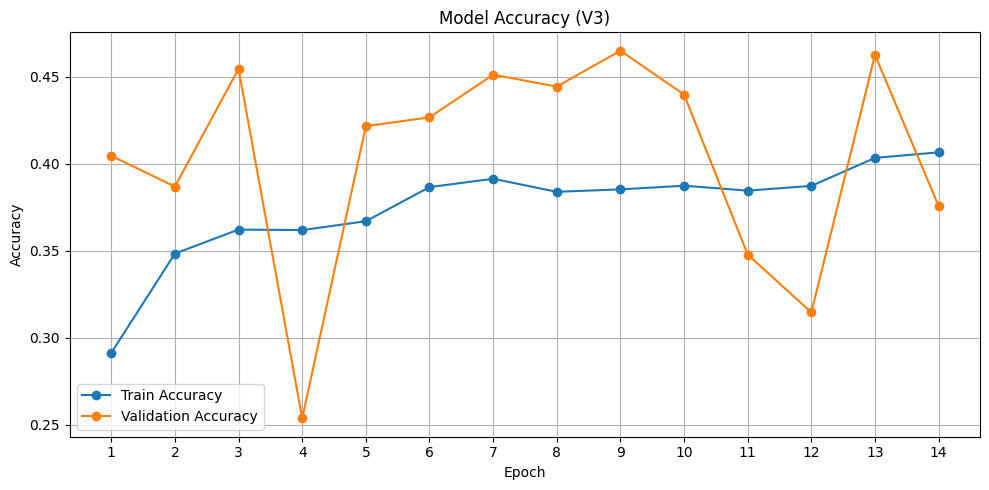

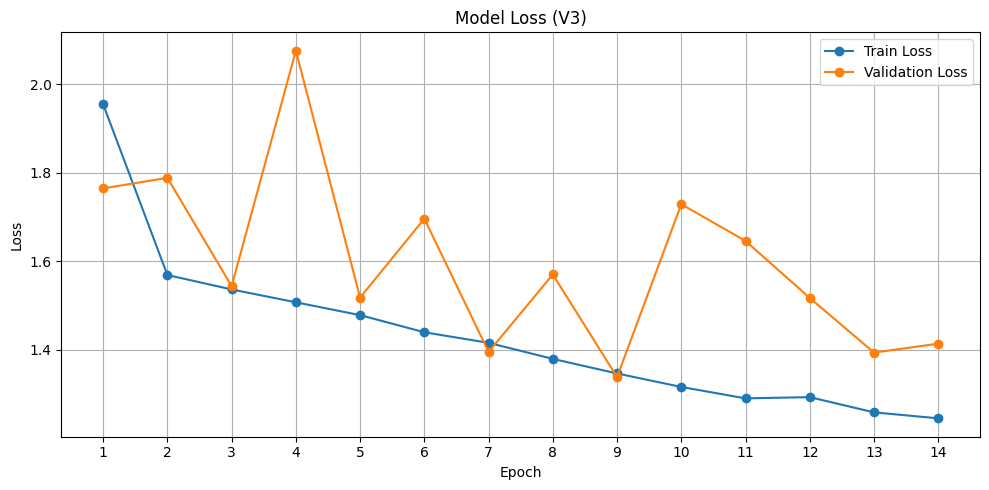

In [1]:
import matplotlib.pyplot as plt

epochs = list(range(1, 15))  

train_accuracy = [0.2912, 0.3483, 0.3621, 0.3618, 0.3669, 0.3865, 0.3913, 0.3838, 0.3852, 0.3873, 0.3845, 0.3872, 0.4033, 0.4065]
val_accuracy = [0.4045, 0.3868, 0.4545, 0.2536, 0.4215, 0.4266, 0.4511, 0.4443, 0.4649, 0.4397, 0.3477, 0.3145, 0.4625, 0.3756]

train_loss = [1.9544, 1.5689, 1.5363, 1.5073, 1.4783, 1.4396, 1.4157, 1.3795, 1.3465, 1.3161, 1.2903, 1.2931, 1.2587, 1.2452]
val_loss = [1.7645, 1.7884, 1.5437, 2.0755, 1.5179, 1.6962, 1.3951, 1.5702, 1.3383, 1.7288, 1.6459, 1.5171, 1.3937, 1.4139]

# Accuracy Plot
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Model Accuracy (V3)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Model Loss (V3)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Found 3146 images belonging to 4 classes.


C:\Users\saite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


99/99 ━━━━━━━━━━━━━━━━━━━━ 31s 314ms/step


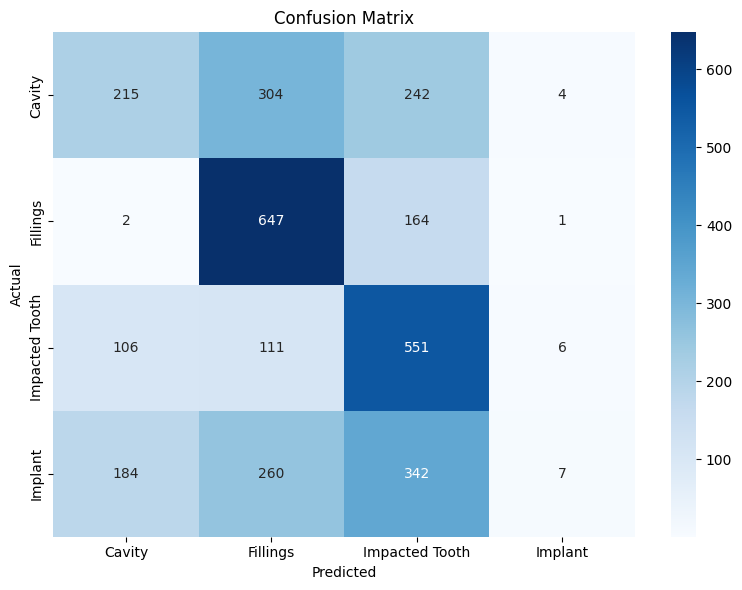

Classification Report:

                precision    recall  f1-score   support

        Cavity       0.42      0.28      0.34       765
      Fillings       0.49      0.79      0.61       814
Impacted Tooth       0.42      0.71      0.53       774
       Implant       0.39      0.01      0.02       793

      accuracy                           0.45      3146
     macro avg       0.43      0.45      0.37      3146
  weighted avg       0.43      0.45      0.37      3146



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load trained model
model = load_model("models/custom_cnn_teeth_health_v3.h5")

# Test data path
test_dir = "D:/Major Project/normalized/test"

# Image preprocessing
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predict
pred_probs = model.predict(test_generator)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_generator.classes

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Classification Report (Precision, Recall, F1)
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:\n")
print(report)
